# Parkinsons Disease
The objective is to find a model which will be able to predict whether a person is likely to have parkinsons disease or not given their medical records.
___

## Model Performamce
Accuracy, F1-Score and Recall were the metrics used to evaluate the performance of the model

| Method    |  Accuracy (%)  | F1-Score (%) | Recall (%) |
|-----------|---------|-----------|---------|
| **Random Forest**   | **97.44**   | **98.41** | **100.00** |
| XGBoost | 89.74   | 93.94 | **100.00** |
| SVM | 89.74   | 93.33 | 90.32 |
___

### Steps to Solve Problem
* Import Dataset and Libraries
* Data Preprocessing
    * Train / Test Data split
    * Missing Data Imputation
    * Outlier Handling
    * Feature Scaling
    * Imbalanced Data
* Model Build
    * Model Initiation and Fitting
    * Test predictions
* Model Perfromance
    * Recall
    * Case Prediction
        


### Import Libraries and Dataset

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis

# For plottling graphs
import seaborn as sns
import matplotlib.pyplot as plt

# for saving tools
import joblib

In [2]:
# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")

Import Dataset

In [3]:
parkinsons = pd.read_csv(r"C:\Users\anagh\Downloads\PDip\PDip\CSV\Parkinson voice dataset.csv")

In [4]:
# Checking First 5 rows of data
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking basic information about the dataset

In [5]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Data Preprocessing

#### Data Shuffle and Split
It is good pratice to split the dataset before preprocessing to avoid data leakage, shuffling the data adds randomness which can boost model performance

In [7]:
# Shuffling the data
parkinsons = parkinsons.sample(frac=1, random_state=42).copy()

In [8]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X = parkinsons.drop(["name", "status"], axis=1)
y = parkinsons["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [9]:
# Setting the train data to variable name "parkinsons" for data preprocessing
parkinsons = X_train.copy()
parkinsons

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
110,200.714,223.982,89.686,0.00621,0.00003,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
38,180.198,201.249,175.456,0.00284,0.00002,0.00153,0.00166,0.00459,0.01444,0.131,...,0.01190,0.02177,0.00231,26.738,0.403884,0.766209,-6.452058,0.212294,2.269398,0.141929
149,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
119,217.116,233.481,93.978,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.124,...,0.01075,0.02038,0.00681,24.581,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [10]:
y_train

110    1
38     1
149    1
111    1
119    1
      ..
125    1
103    1
13     1
69     1
51     0
Name: status, Length: 156, dtype: int64

In [11]:
parkinsons.iloc[0]

MDVP:Fo(Hz)         200.714000
MDVP:Fhi(Hz)        223.982000
MDVP:Flo(Hz)         89.686000
MDVP:Jitter(%)        0.006210
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.003710
MDVP:PPQ              0.003370
Jitter:DDP            0.011120
MDVP:Shimmer          0.022860
MDVP:Shimmer(dB)      0.207000
Shimmer:APQ3          0.011920
Shimmer:APQ5          0.014390
MDVP:APQ              0.018520
Shimmer:DDA           0.035760
NHR                   0.007040
HNR                  23.239000
RPDE                  0.436084
DFA                   0.727863
spread1              -5.258320
spread2               0.256454
D2                    2.550961
PPE                   0.232520
Name: 110, dtype: float64

#### Handling of Missing data


In [12]:
# Extracting features
features = [feature for feature in parkinsons.columns]

There is no missing data in this dataset

In [13]:
# Check total of missing values
parkinsons.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### Feature Scaling
Scaling values to a range of -3 to 3, so as to boost model perfomance

In [14]:
# import library for scaling
from sklearn.preprocessing import StandardScaler
import os

# Initialize and scale values
scaler = StandardScaler()
scaler.fit(parkinsons[features])
parkinsons[features] = scaler.transform(parkinsons[features])

# Create directory if it doesn't exist
directory = r"C:\Users\anagh\Downloads\PDip\PDip\Scaler"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the scaler object
import joblib
joblib.dump(scaler, r"C:\Users\anagh\Downloads\PDip\PDip\Scaler\\scaler_joblib")

['C:\\Users\\anagh\\Downloads\\PDip\\PDip\\Scaler\\\\scaler_joblib']

### Class Imbalance

In [15]:
#  Ratio of No Parkinson to Parkinson
y_train.value_counts(normalize=True)

status
1    0.74359
0    0.25641
Name: proportion, dtype: float64

In [16]:
# joining the data together
parkinsons = pd.concat([parkinsons, y_train], axis=1)

In [17]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=51)
X = parkinsons.drop("status", axis=1)
y = parkinsons["status"]
X_train, y_train = smote.fit_resample(X, y)

In [18]:

y_train.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

### Model Building

#### Preprocessing Test data

In [19]:
X_test[features] = scaler.transform(X_test[features]) # scaling features

In [20]:
# checking first 5 rows of data
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
178,-0.151432,-0.447968,0.531967,-0.627798,-0.672123,-0.581369,-0.560485,-0.581443,-0.705749,-0.689308,...,-0.619726,-0.677014,-0.479478,0.519697,-0.883598,0.798224,-0.550574,-0.517415,-0.323720,-0.483962
171,-1.039602,-0.700585,-0.238230,-0.537601,-0.392743,-0.536514,-0.546879,-0.535520,-0.818315,-0.754158,...,-0.717257,-0.846283,-0.491718,0.958974,-0.782484,0.693933,-0.561047,-0.078752,-0.470999,-0.483204
137,-1.024432,-0.731969,-0.354934,-0.249362,-0.113364,-0.244957,-0.131912,-0.243967,1.225079,0.976850,...,1.010606,1.308839,0.260061,-1.143867,1.220770,-0.169468,0.952868,0.947541,0.742242,0.751637
15,-0.313735,0.149539,-0.760321,-0.510150,-0.392743,-0.565350,-0.502661,-0.565423,-0.742750,-0.769124,...,-0.590870,-0.742018,-0.398410,0.685294,0.659299,-1.073972,0.331183,-0.183522,-0.440262,0.320589
157,-0.906877,-0.692143,-0.352990,2.321258,2.959811,2.510423,1.249044,2.510302,1.033820,0.787287,...,0.307688,1.032409,1.890187,-0.638612,1.269749,-1.279736,2.051050,0.936787,1.482436,0.609947


In [21]:
X_test.shape

(39, 22)

#### Random Forest

Import Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(random_state=51, n_jobs=-1)

Train model and make predictions

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [25]:
predictions = model.predict(X_test)

#### RF Performance

In [26]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [27]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %")
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 97.44 %
The f1 score is 98.41 %
The recall is 100.00 %


Confusion matrix

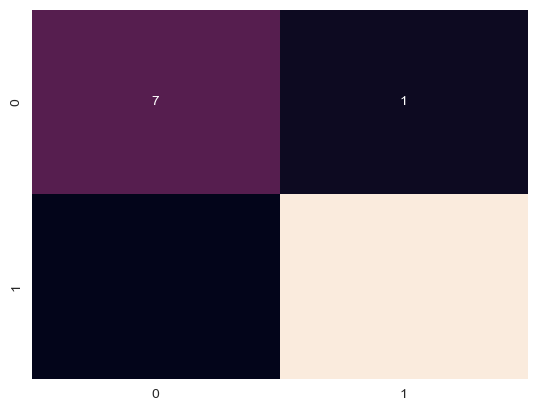

In [28]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

XGboost

Import Model

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb = XGBClassifier(random_state=51)

Train model and make predictions

In [31]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=51, ...)

In [32]:
predictions = xgb.predict(X_test)

#### XGBoost Performance

In [33]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %")
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.94 %
The recall is 100.00 %


Confusion Matrix

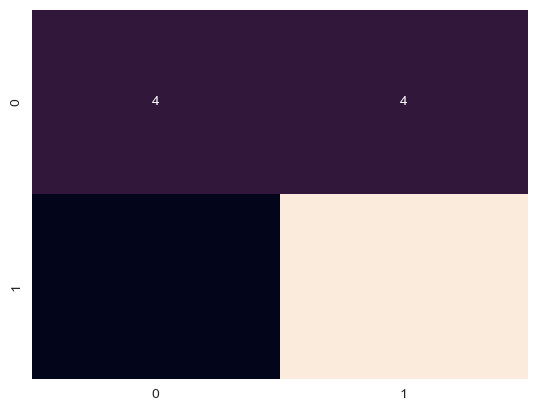

In [34]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### SVM

Import Model

In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC()

Train model and make predictions

In [37]:
svm.fit(X_train, y_train)

SVC()

In [38]:
predictions = svm.predict(X_test)

#### SVM Performance

In [39]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %")
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.33 %
The recall is 90.32 %


Confusion Matrix

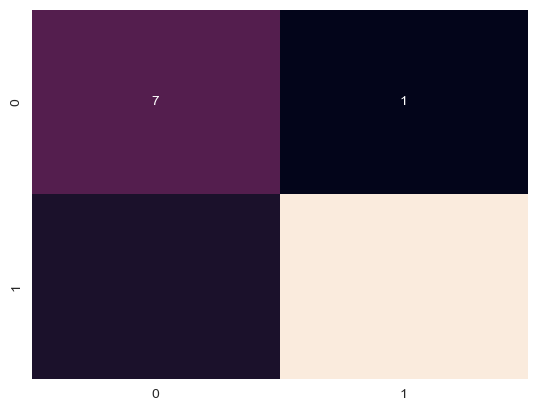

In [40]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### Most important features
Here we check the top 10 most important features that contribute to the prediction of parkinsons
* spread1
* MDVP:Fo(Hz)
* PPE
* MDVP:Fhi(Hz)
* spread2
* MDVP:APQ
* MDVP:Flo(Hz)
* Shimmer:APQ5
* MDVP:PPQ
* MDVP:Shimmer


In [41]:
importance_df = pd.DataFrame({
    "Feature" : features,
    "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

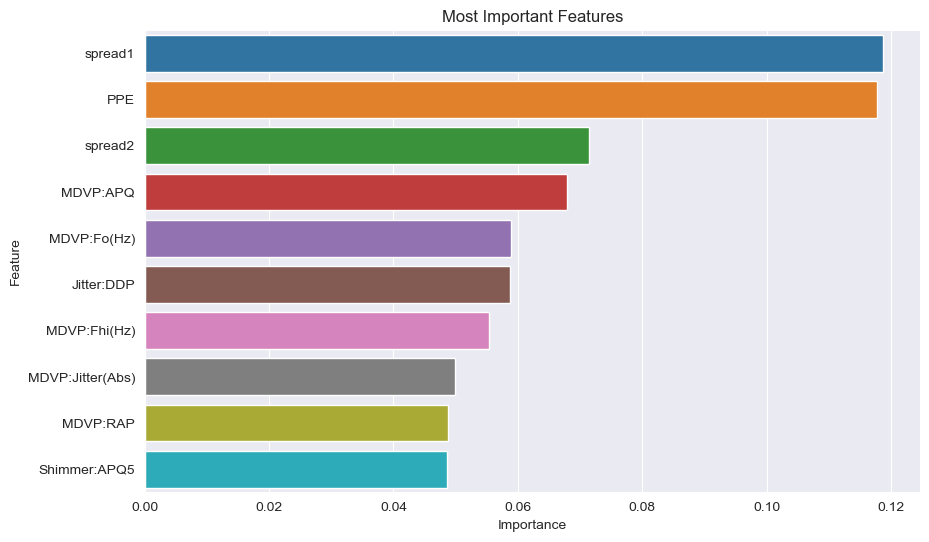

In [42]:
plt.figure(figsize=[10,6])
plt.title("Most Important Features")
sns.barplot(data=importance_df.head(10), y="Feature", x="Importance");

### Saving The Model

Random Forest had the best recall and F1 score so that would be our final model

In [43]:

# #file_path = r"/Untitled Folder"

# file_path = r'C:\Users\anagh\OneDrive\Desktop\your_model.sav'
# joblib.dump(model, file_path)


TESTING IF PERSON HAS PD

In [44]:
input_data = (119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654)
#input_data = (241.404, 248.834, 232.483, 0.00281, 0.00001, 0.00157, 0.00173, 0.0047, 0.0176, 0.154, 0.01006, 0.01038, 0.01251, 0.03017, 0.00675, 23.145, 0.457702, 0.634267, -6.793547, 0.158266, 2.256699, 0.117399)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array-compacting it w/o losing relevant data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons


C:\Users\anagh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anagh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:

#file_path = r"/Untitled Folder"

file_path = r"C:\Users\anagh\Downloads\PDip\PDip\Sav\model.sav"
joblib.dump(model, file_path)


['C:\\Users\\anagh\\Downloads\\PDip\\PDip\\Sav\\model.sav']

In [46]:
model

RandomForestClassifier(n_jobs=-1, random_state=51)

In [47]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\anagh\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\anagh\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
97     -0.733547     -0.593694      0.004159        1.276147   
138    -1.047149     -0.768985     -0.275727       -0.308186   
54     -1.131254     -0.687623     -0.303989        0.258487   
191     1.336716      0.509098     -0.613827       -0.127792   
105    -0.129402     -0.427655      0.407393       -0.729760   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
97           1.562913  1.312153  0.925914    1.310983      0.499130   
138         -0.113364 -0.305832 -0.206742   -0.304841      1.414774   
54           0.724775  0.049805  0.459926    0.04865

C:\Users\anagh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6907 - loss: 0.5767 - val_accuracy: 0.7812 - val_loss: 0.4822
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 0.4304 - val_accuracy: 0.7500 - val_loss: 0.3917
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.3942 - val_accuracy: 0.8125 - val_loss: 0.3468
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3251 - val_accuracy: 0.8125 - val_loss: 0.3177
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.2862 - val_accuracy: 0.8750 - val_loss: 0.2869
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.2549 - val_accuracy: 0.9062 - val_loss: 0.2671
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8998 - loss: 0.2137 - val_accuracy: 0.9062 - val_loss: 0.2571
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1852 - val_accuracy: 0.9062 - val_loss: 0.2522
Epo

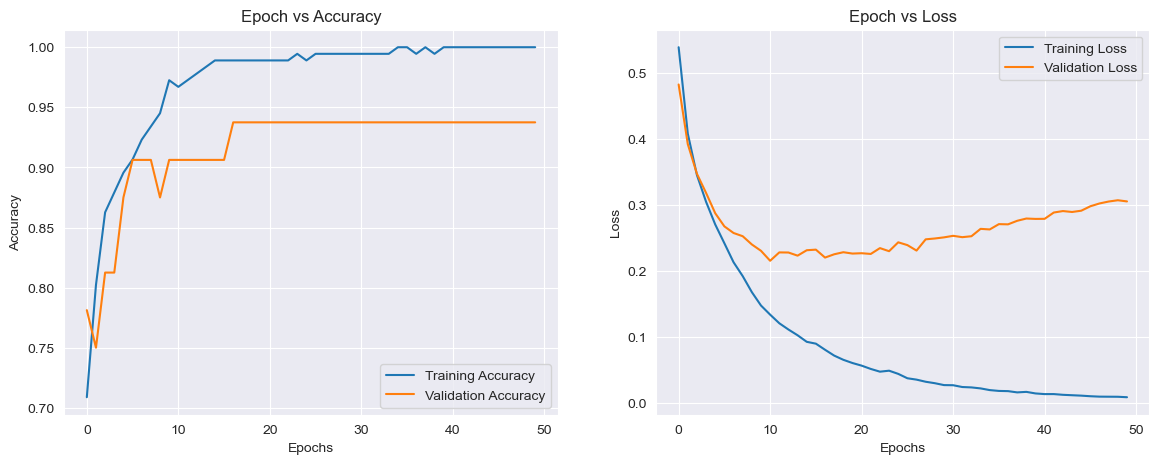

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")


# Check the column names in the dataset
print(parkinsons.columns)

# Print the first few rows to inspect the column names
print(parkinsons.head())

# Data Shuffle and Split
parkinsons = parkinsons.sample(frac=1, random_state=42).copy()

# Ensure the columns 'name' and 'status' exist in the dataset
if 'name' in parkinsons.columns and 'status' in parkinsons.columns:
    X = parkinsons.drop(["name", "status"], axis=1)
    y = parkinsons["status"]
else:
    # Handle the case where columns might have different names or are missing
    print("Columns 'name' or 'status' not found in the dataset.")
    # For demonstration, let's assume 'name' is not present and 'status' is correctly named
    X = parkinsons.drop(["status"], axis=1)
    y = parkinsons["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Class Imbalance
smote = SMOTE(random_state=51)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Build Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Plotting the results
plt.figure(figsize=(14, 5))

# Epoch vs Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Epoch vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
